In [ ]:
pip install pandas mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Data Understanding and Data Preprocessing


In [ ]:
import json
with open("train.json") as f:
    data = json.load(f)
print(f"Total data: {len(data)}\n")

Total data: 39774



In [ ]:
cuisines = sorted(set(item['cuisine'] for item in data))
print("Daftar semua cuisine yang tersedia:")
for c in cuisines:
    print("-", c)

Daftar semua cuisine yang tersedia:
- brazilian
- british
- cajun_creole
- chinese
- filipino
- french
- greek
- indian
- irish
- italian
- jamaican
- japanese
- korean
- mexican
- moroccan
- russian
- southern_us
- spanish
- thai
- vietnamese


In [ ]:
asia_cuisines = ['chinese', 'japanese', 'thai', 'korean', 'vietnamese', 'filipino', 'indian']
asia_recipes = [item for item in data if item['cuisine'] in asia_cuisines]
print(f"Total resep dari Asia: {len(asia_recipes)}\n")

Total resep dari Asia: 11048



In [ ]:
for idx, recipe in enumerate(asia_recipes[:10], 1):
    print(f"{idx}. Cuisine: {recipe['cuisine']}")
    print("   Ingredients:", recipe['ingredients'])
    print()

1. Cuisine: filipino
   Ingredients: ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']

2. Cuisine: indian
   Ingredients: ['water', 'vegetable oil', 'wheat', 'salt']

3. Cuisine: indian
   Ingredients: ['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thigh', 'garam masala', 'double cream', 'natural yogurt', 'bay leaf']

4. Cuisine: chinese
   Ingredients: ['low sodium soy sauce', 'fresh ginger', 'dry mustard', 'green beans', 'white pepper', 'sesame oil', 'scallions', 'canola oil', 'sugar', 'Shaoxing wine', 'garlic', 'ground turkey', 'water', 'crushed red pepper flakes', 'corn starch']

5. Cuisine: indian
   Ingredients: ['tumeric', 'vegetable stock', 'tomatoes', 'garam masala', 'naan', 'red lentils', 'r

In [ ]:
sea_cuisines = ['thai','vietnamese', 'filipino']
sea_recipes = [item for item in data if item['cuisine'] in sea_cuisines]
print(f"Total resep dari Asia Tenggara: {len(sea_recipes)}\n")

Total resep dari Asia Tenggara: 3119



In [ ]:
for idx, recipe in enumerate(sea_recipes, 1):
    print(f"{idx}. Cuisine: {recipe['cuisine']}")
    print("   Ingredients:", recipe['ingredients'])
    print()

1. Cuisine: filipino
   Ingredients: ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']

2. Cuisine: thai
   Ingredients: ['sugar', 'hot chili', 'asian fish sauce', 'lime juice']

3. Cuisine: vietnamese
   Ingredients: ['soy sauce', 'vegetable oil', 'red bell pepper', 'chicken broth', 'yellow squash', 'garlic chili sauce', 'sliced green onions', 'broccolini', 'salt', 'fresh lime juice', 'cooked rice', 'chicken breasts', 'corn starch']

4. Cuisine: thai
   Ingredients: ['pork loin', 'roasted peanuts', 'chopped cilantro fresh', 'hoisin sauce', 'creamy peanut butter', 'chopped fresh mint', 'thai basil', 'rice', 'medium shrimp', 'water', 'rice noodles', 'beansprouts']

5. Cuisine: thai
   Ingredients: ['eggs', 'shallots', 'firm tofu', 'beansprouts', 'turnips', 'palm sugar', 'vegetable oil', 'garlic cloves', 'sliced chicken', 'fish sauce', 'lime wedges', 'roasted peanuts

In [ ]:
all_ingredients = []
for recipe in sea_recipes:
    all_ingredients.extend(recipe['ingredients'])

unique_ingredients = sorted(set(all_ingredients))

print(f"Total bahan: {len(unique_ingredients)}\n")

Total bahan: 2014



In [ ]:
for idx, ing in enumerate(unique_ingredients, 1):
    print(f"{idx}. {ing}")

1. (    oz.) tomato sauce
2. 7 Up
3. Accent Seasoning
4. Alaskan king crab legs
5. American cheese
6. Anaheim chile
7. Asian chili sauce
8. Asian sweet chili sauce
9. Balsamico Bianco
10. Boston lettuce
11. Bragg Liquid Aminos
12. Chinese egg noodles
13. Ciabatta rolls
14. Conimex Wok Olie
15. Conimex Woksaus Specials Vietnamese Gember Knoflook
16. Dungeness crabs
17. Edam
18. Equal Sweetener
19. Flora Cuisine
20. Flora pro.activ
21. Foster Farms boneless skinless chicken breasts
22. Frank's® RedHot® Original Cayenne Pepper Sauce
23. Gochujang base
24. Heinz Tomato Ketchup
25. Hellmann's® Real Mayonnaise
26. Himalayan salt
27. Holland House White Wine Vinegar
28. I Can't Believe It's Not Butter!® Spread
29. Italian basil
30. Italian cheese
31. Italian parsley leaves
32. Japanese rice vinegar
33. Japanese soy sauce
34. Japanese turnips
35. Jasmine brown rice
36. Jell-O Gelatin Dessert
37. Jif Creamy Peanut Butter
38. Kikkoman Soy Sauce
39. Kim Crawford Sauvignon Blanc
40. Knorr Fish Sto

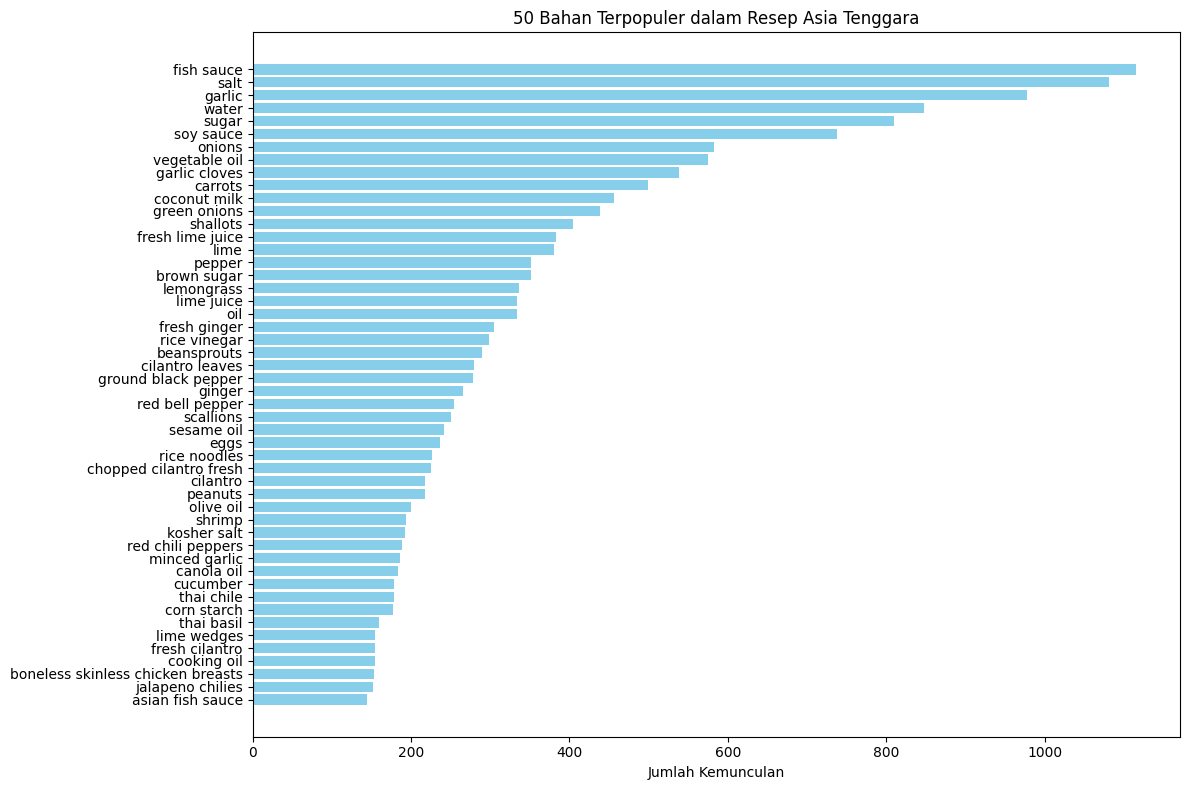

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
ingredient_counts = Counter(all_ingredients)
top_50 = ingredient_counts.most_common(50)
ingredients, counts = zip(*top_50)

plt.figure(figsize=(12, 8))
plt.barh(ingredients[::-1], counts[::-1], color='skyblue')
plt.title("50 Bahan Terpopuler dalam Resep Asia Tenggara")
plt.xlabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

In [ ]:
valid_ingredients = {ing for ing, count in ingredient_counts.items() if count >= 1}
print(f"Total bahan unik setelah di filter: {len(valid_ingredients)}\n")

Total bahan unik setelah di filter: 2014



In [ ]:
transactions = []
for recipe in sea_recipes:
    filtered_ingredients = [ing for ing in recipe['ingredients'] if ing in valid_ingredients]
    if filtered_ingredients:
        transactions.append(filtered_ingredients)

print("Contoh data:")
for t in transactions[:5]:
    print(t)

Contoh data:
['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']
['sugar', 'hot chili', 'asian fish sauce', 'lime juice']
['soy sauce', 'vegetable oil', 'red bell pepper', 'chicken broth', 'yellow squash', 'garlic chili sauce', 'sliced green onions', 'broccolini', 'salt', 'fresh lime juice', 'cooked rice', 'chicken breasts', 'corn starch']
['pork loin', 'roasted peanuts', 'chopped cilantro fresh', 'hoisin sauce', 'creamy peanut butter', 'chopped fresh mint', 'thai basil', 'rice', 'medium shrimp', 'water', 'rice noodles', 'beansprouts']
['eggs', 'shallots', 'firm tofu', 'beansprouts', 'turnips', 'palm sugar', 'vegetable oil', 'garlic cloves', 'sliced chicken', 'fish sauce', 'lime wedges', 'roasted peanuts', 'green papaya', 'chile powder', 'ground black pepper', 'tamarind paste', 'chinese chives']


# V2

# Data Understanding

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/bebekgarut/association-rules-apriori-southeast-asian-food/refs/heads/main/dataset/resep_masakan.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   negara        110 non-null    object
 1   masakan       110 non-null    object
 2   bahan         110 non-null    object
 3   gambar        12 non-null     object
 4   gambarnegara  110 non-null    object
dtypes: object(5)
memory usage: 4.4+ KB


In [ ]:
display(data)

,negara,masakan,bahan,gambar,gambarnegara
0,Indonesia,Nasi Goreng,"nasi, ayam, bawang merah, bawang putih, kecap ...",img/makanan/nasi-goreng.png,img/bendera/Indonesia.png
1,Indonesia,Miee Aceh,"daging sapi, udang, kaldu, kol, tauge, mie ace...",img/makanan/mie-aceh.png,img/bendera/Indonesia.png
2,Indonesia,Tahu Tempe Bacem,"tahu, tempe, asam, kecap manis, air kelapa par...",NaN,img/bendera/Indonesia.png
3,Indonesia,Ayam Goreng,"ayam, merica, garam, jeruk nipis, asam, lengku...",NaN,img/bendera/Indonesia.png
4,Indonesia,Soto Padang,"daging sapi, air, minyak goreng, serai, daun s...",NaN,img/bendera/Indonesia.png
...,...,...,...,...,...
105,Singapura,Popiah,"Kulit lumpia, rebung, wortel, kentang, telur, ...",NaN,img/bendera/Singapura.png
106,Singapura,Fish Head Curry,"ikan, santan, kari bubuk, tomat, okra, bawang ...",NaN,img/bendera/Singapura.png
107,Singapura,Roti Prata,"Tepung terigu, telur, air, garam, minyak goreng",NaN,img/bendera/Singapura.png
108,Singapura,Satay Singapura,"Daging sapi, kecap manis, bawang putih, kunyit...",NaN,img/bendera/Singapura.png


# Data Preprocessing

In [ ]:
data['bahan'] = data['bahan'].apply(lambda x: [b.strip().lower() for b in str(x).split(',')])

In [ ]:
all_ingredients = []
for bahan_list in data['bahan']:
    all_ingredients.extend(bahan_list)

unique_ingredients = sorted(set(all_ingredients))

print(f"Total bahan: {len(unique_ingredients)}\n")
print(unique_ingredients)

Total bahan: 200

['acar lobak', 'acar sayuran', 'air', 'air kelapa parut', 'asam', 'ayam', 'bagoong', 'baguette', 'baking powder', 'bakso', 'bakso ikan', 'bawang', 'bawang bombay', 'bawang merah', 'bawang putih', 'bayam', 'beras', 'beras ketan', 'bihun', 'biji mustard', 'biji wijen', 'bubuk cabai', 'bubuk kari', 'bubuk koya', 'bumbu rempah', 'buncis', 'bunga lawang', 'bunga pisang', 'cabai', 'cengkeh', 'cuka', 'cumie-cumie', 'daging babi', 'daging ham', 'daging kerbau', 'daging sapi', 'daging sapig', 'dan telur', 'dasam', 'daun basil', 'daun bawang', 'daun jeruk', 'daun jeruk purut', 'daun ketumbar', 'daun kunyit', 'daun merica', 'daun merica bokor', 'daun mint', 'daun pisang', 'daun salam', 'daun talas', 'daun teh fermentasi', 'ekor sapi', 'fish sauce', 'garam', 'gula', 'gula kastor', 'gula merah', 'hati', 'ikan', 'ikan asin', 'ikan teri', 'jagung', 'jahe', 'jamur', 'jamur kancing', 'jamur kuping', 'jeruk nipis', 'jeruk purut', 'jintan', 'kacang hijau', 'kacang merah', 'kacang mete',

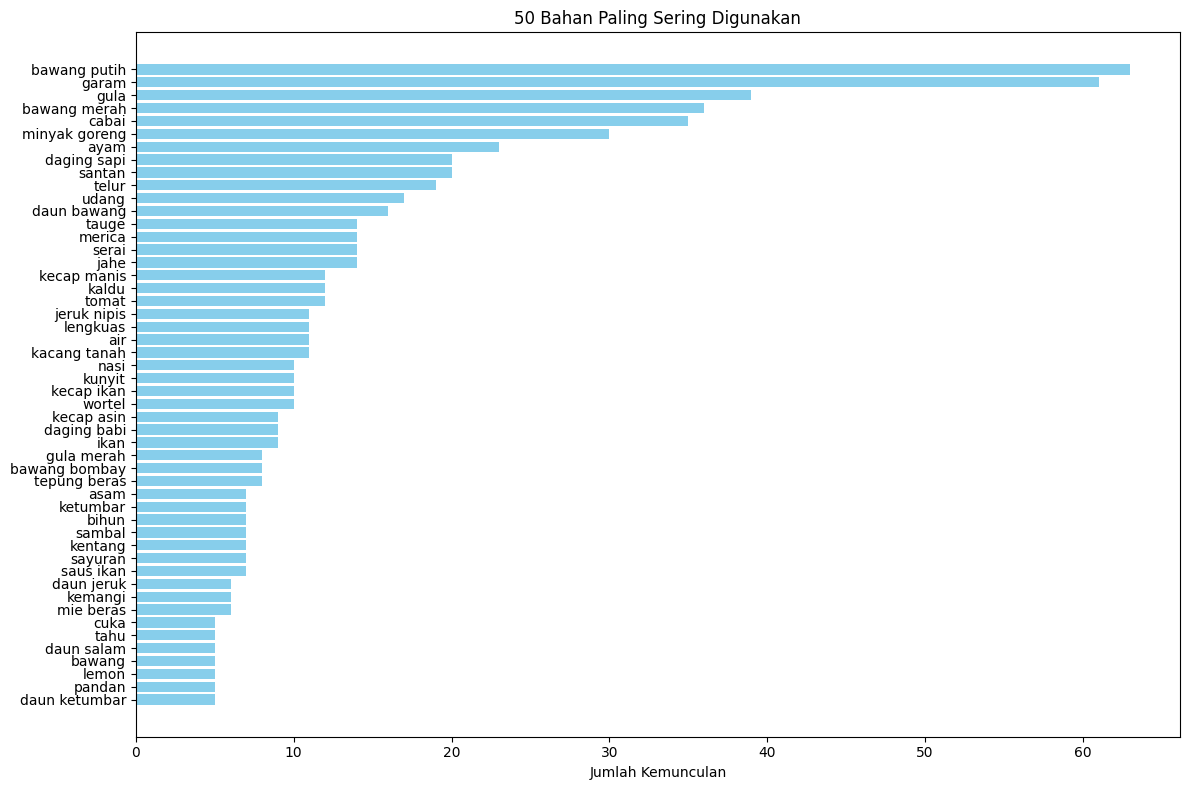

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
ingredient_counts = Counter(all_ingredients)
top_50 = ingredient_counts.most_common(50)
ingredients, counts = zip(*top_50)

plt.figure(figsize=(12, 8))
plt.barh(ingredients[::-1], counts[::-1], color='skyblue')
plt.title("50 Bahan Paling Sering Digunakan")
plt.xlabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

In [ ]:
transactions = data['bahan'].tolist()
print(transactions)

[['nasi', 'ayam', 'bawang merah', 'bawang putih', 'kecap manis', 'telur', 'minyak goreng', 'garam'], ['daging sapi', 'udang', 'kaldu', 'kol', 'tauge', 'mie aceh', 'bawang putih', 'bawang merah', 'tomat', 'daun bawang', 'seledri', 'cuka', 'kecap asin', 'cabai'], ['tahu', 'tempe', 'asam', 'kecap manis', 'air kelapa parut', 'minyak goreng', 'bawang merah', 'bawang putih', 'ketumbar', 'gula merah', 'garam'], ['ayam', 'merica', 'garam', 'jeruk nipis', 'asam', 'lengkuas', 'serai', 'minyak goreng', 'bawang merah', 'bawang putih', 'kunyit', 'jahe', 'kemiri', 'gula merah'], ['daging sapi', 'air', 'minyak goreng', 'serai', 'daun salam', 'daun bawang', 'daun jeruk', 'kapulaga', 'bunga lawang', 'cengkeh', 'bawang putih', 'lengkuas', 'jahe', 'kunyit', 'pala', 'ketumbar', 'merica', 'bihun', 'seledri', 'kecap manis', 'cuka', 'sambal'], ['mie basah', 'tauge', 'sawi hijau', 'daun bawang', 'kecap asin', 'kecap manis', 'minyak goreng', 'bawang', 'bawang merah', 'ayam', 'bawang putih', 'jahe', 'kaldu', 'l

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(df_encoded.head(20).to_string())

    acar lobak  acar sayuran    air  air kelapa parut   asam   ayam  bagoong  baguette  baking powder  bakso  bakso ikan  bawang  bawang bombay  bawang merah  bawang putih  bayam  beras  beras ketan  bihun  biji mustard  biji wijen  bubuk cabai  bubuk kari  bubuk koya  bumbu rempah  buncis  bunga lawang  bunga pisang  cabai  cengkeh   cuka  cumie-cumie  daging babi  daging ham  daging kerbau  daging sapi  daging sapig  dan telur  dasam  daun basil  daun bawang  daun jeruk  daun jeruk purut  daun ketumbar  daun kunyit  daun merica  daun merica bokor  daun mint  daun pisang  daun salam  daun talas  daun teh fermentasi  ekor sapi  fish sauce  garam   gula  gula kastor  gula merah   hati   ikan  ikan asin  ikan teri  jagung   jahe  jamur  jamur kancing  jamur kuping  jeruk nipis  jeruk purut  jintan  kacang hijau  kacang merah  kacang mete  kacang panjang  kacang polong  kacang tanah  kaldu  kaldu bubuk  kaldu ikan  kaldu jamur  kaldu udang  kangkung  kapulaga  kari bubuk  kayu manis  keca

# Model Development

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True,  max_len=3)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                      antecedents            consequents   support  \
0                          (ayam)         (bawang putih)  0.181818   
1                          (ayam)                (garam)  0.154545   
2                  (bawang merah)         (bawang putih)  0.245455   
3                   (daun bawang)         (bawang merah)  0.100000   
4                  (bawang merah)                (garam)  0.172727   
5                         (serai)         (bawang merah)  0.100000   
6                         (cabai)         (bawang putih)  0.209091   
7                   (daging sapi)         (bawang putih)  0.118182   
8                   (daun bawang)         (bawang putih)  0.100000   
9                         (garam)         (bawang putih)  0.372727   
10                 (bawang putih)                (garam)  0.372727   
11                         (gula)         (bawang putih)  0.245455   
12                         (jahe)         (bawang putih)  0.109091   
13                  